In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
Churn=pd.read_csv("C:/Users/Net/Downloads/Churn_Prediction_Hackathon/churn.csv")

In [3]:
Churn.head(10)

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [4]:
## 	Int'l Plan -- International Plans
## VMail Plan -- Voice Mail Plans
## VMail Message -- Yes if VMail plan is available else no 
## Day Mins -- No of minuites call in day (morning)
## Day Calls-- No of calls in day (morning)
## Day Charge -- Charge for the day (morning)
## Eve Mins -- No of min call in Evening
## Eve Calls-- No of calls in Evening
## Eve Charge -- Charge for the Evening
## Night Mins -- No of min call in Night
## Night Calls-- No of calls in Night
## Night Charge -- Charge for the Night
## Intl Mins -- International Call minutes
## Intl Calls -- No of international Calls
## Intl Charge -- Charge for the international calls
## CustServ Calls -- Service Calls
##Churn? -- True - Customer left
##          False - Customer present not churnng

In [5]:
Churn.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Intl Plan         0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64

In [6]:
Churn1=Churn.iloc[:,4:]

In [7]:
Churn1.head()

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
## DATA ENCODING
## Intl Plan && Vmail Plan    0 means No  && 1 means Yes
## In Churn    True=1   && False =0

In [9]:

le=LabelEncoder()
Churn1['Intl Plan']=le.fit_transform(Churn1['Intl Plan'])
Churn1['VMail Plan']=le.fit_transform(Churn1['VMail Plan'])
Churn1['Churn']=le.fit_transform(Churn1['Churn'])

In [10]:
Churn1.head()

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [11]:

### Using IQR (Interquartile Range) Method to find the Outlier

In [12]:
Churn1.describe()

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [13]:
def iqr_cap(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower, upper)


In [14]:
Cols=['VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Charge','Intl Mins','Intl Calls','Intl Charge']


In [15]:
for i in Cols:
    iqr_cap(Churn1,i)

In [16]:
Churn1.describe()

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.096910,0.276628,8.098710,179.816157,100.473597,30.569292,201.009541,100.134113,17.086016,200.828143,100.107711,9.037381,10.254575,4.424842,2.769320,1.562856,0.144914
std,0.295879,0.447398,13.687436,54.152190,19.863740,9.205865,50.401365,19.758567,4.284135,50.118622,19.568609,2.255212,2.721007,2.272343,0.734445,1.315491,0.352067
min,0.000000,0.000000,0.000000,34.650000,46.500000,5.890000,63.550000,46.500000,5.400000,64.550000,33.000000,2.915000,3.100000,0.000000,0.845000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,1.000000,1.000000,50.000000,325.450000,154.500000,55.330000,338.350000,154.500000,28.760000,337.750000,175.000000,15.195000,17.500000,10.500000,4.725000,9.000000,1.000000


In [17]:
## Checking Multicolinearty Using Co-Relation Matrix

In [18]:
Churn2=Churn1.iloc[:,2:16]

In [19]:
corr=Churn2.corr()
corr

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
VMail Message,1.000000,0.000998,-0.010258,0.000995,0.017163,-0.006833,0.017180,0.007660,0.007140,0.007638,0.001004,0.010168,0.001014,-0.013254
Day Mins,0.000998,1.000000,0.002755,1.000000,0.006675,0.016928,0.006661,0.003231,0.022671,0.003205,-0.011832,0.007595,-0.011773,-0.013134
Day Calls,-0.010258,0.002755,1.000000,0.002758,-0.021362,0.010388,-0.021358,0.022214,-0.019765,0.022212,0.021812,0.002031,0.021934,-0.018388
Day Charge,0.000995,1.000000,0.002758,1.000000,0.006683,0.016928,0.006668,0.003231,0.022672,0.003206,-0.011834,0.007594,-0.011775,-0.013138
Eve Mins,0.017163,0.006675,-0.021362,0.006683,1.000000,-0.016497,1.000000,-0.013163,0.007070,-0.013185,-0.012030,0.006744,-0.012076,-0.013870
Eve Calls,-0.006833,0.016928,0.010388,0.016928,-0.016497,1.000000,-0.016490,-0.000826,0.006515,-0.000783,0.008145,0.015031,0.008104,0.002412
Eve Charge,0.017180,0.006661,-0.021358,0.006668,1.000000,-0.016490,1.000000,-0.013170,0.007080,-0.013192,-0.012038,0.006743,-0.012084,-0.013871
Night Mins,0.007660,0.003231,0.022214,0.003231,-0.013163,-0.000826,-0.013170,1.000000,0.010974,0.999999,-0.014236,-0.005731,-0.014180,-0.009167
Night Calls,0.007140,0.022671,-0.019765,0.022672,0.007070,0.006515,0.007080,0.010974,1.000000,0.010952,-0.013408,0.001252,-0.013422,-0.012802
Night Charge,0.007638,0.003205,0.022212,0.003206,-0.013185,-0.000783,-0.013192,0.999999,0.010952,1.000000,-0.014244,-0.005701,-0.014189,-0.009157


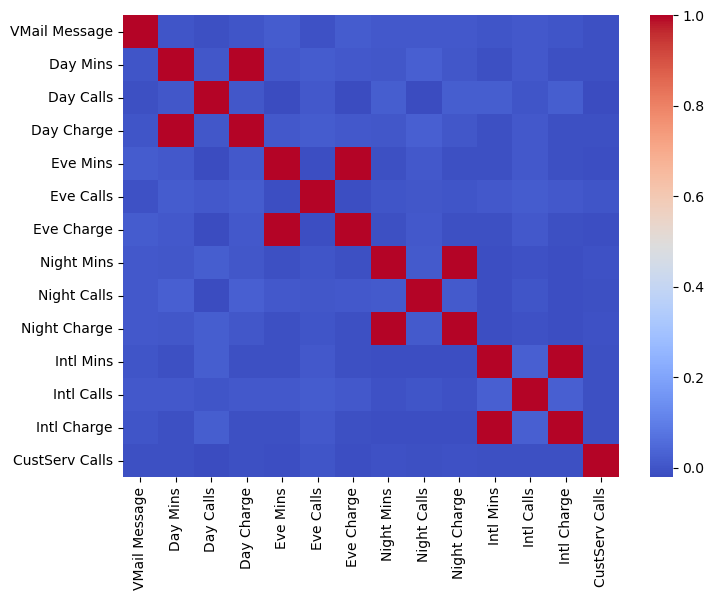

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

In [21]:
## Removing the values with high dependencies to reduce multicolinearity

In [22]:
Churn1=Churn1.drop('Day Charge',axis=1)
Churn1=Churn1.drop('Eve Charge',axis=1)
Churn1=Churn1.drop('Night Charge',axis=1)
Churn1=Churn1.drop('Intl Charge',axis=1)

In [23]:
Churn1.head()

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn
0,0,1,25,265.1,110.0,197.40,99.0,244.7,91,10.0,3.0,1,0
1,0,1,26,161.6,123.0,195.50,103.0,254.4,103,13.7,3.0,1,0
2,0,0,0,243.4,114.0,121.20,110.0,162.6,104,12.2,5.0,0,0
3,1,0,0,299.4,71.0,63.55,88.0,196.9,89,6.6,7.0,2,0
4,1,0,0,166.7,113.0,148.30,122.0,186.9,121,10.1,3.0,3,0


In [24]:
## Doing Feature Scaling to reduce the effect of dominant values with fetching result

In [25]:

scaler=MinMaxScaler()
ScaleChurn=scaler.fit_transform(Churn1)
Churn3=pd.DataFrame(ScaleChurn,columns=Churn1.columns)

In [26]:
Churn3.head()

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn
0,0.0,1.0,0.50,0.792469,0.587963,0.487082,0.486111,0.659407,0.408451,0.479167,0.285714,0.111111,0.0
1,0.0,1.0,0.52,0.436554,0.708333,0.480167,0.523148,0.694912,0.492958,0.736111,0.285714,0.111111,0.0
2,0.0,0.0,0.00,0.717847,0.625000,0.209789,0.587963,0.358895,0.500000,0.631944,0.476190,0.000000,0.0
3,1.0,0.0,0.00,0.910420,0.226852,0.000000,0.384259,0.484444,0.394366,0.243056,0.666667,0.222222,0.0
4,1.0,0.0,0.00,0.454092,0.615741,0.308406,0.699074,0.447840,0.619718,0.486111,0.285714,0.333333,0.0


In [27]:
### Splliting the dataset into test and train data set

In [28]:
x=Churn3.iloc[:,:12]
y=Churn3.iloc[:,12]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
x_test.head()

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls
438,0.0,0.0,0.0,0.413858,0.430556,0.971798,0.550926,0.456991,0.633803,0.722222,0.285714,0.111111
2674,0.0,0.0,0.0,0.256018,0.652778,0.559862,0.717593,0.453331,0.760563,0.673611,0.571429,0.000000
1345,0.0,0.0,0.0,0.000000,0.000000,0.349527,0.773148,0.375366,0.387324,0.256944,0.095238,0.444444
1957,0.0,0.0,0.0,0.612620,0.300926,0.511463,0.412037,0.335469,0.563380,0.493056,0.190476,0.111111
2148,0.0,0.0,0.0,0.376032,0.513889,0.586426,0.245370,0.597182,0.408451,0.479167,0.666667,0.111111


In [30]:
x_train.head()

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls
2016,0.0,0.0,0.00,0.576857,0.662037,0.715611,0.189815,0.413067,0.556338,0.423611,0.476190,0.333333
1362,0.0,0.0,0.00,0.337861,0.699074,0.012555,0.143519,0.350842,0.619718,0.472222,0.190476,0.333333
2670,0.0,1.0,0.24,0.640818,0.569444,0.318231,0.662037,0.418924,0.330986,0.409722,0.571429,0.222222
2210,0.0,0.0,0.00,0.839924,0.587963,0.460881,0.189815,0.697840,0.359155,0.597222,0.666667,0.000000
1846,0.0,1.0,0.86,0.492607,0.652778,0.405932,0.217593,0.354136,0.591549,0.583333,0.380952,0.111111


In [31]:
x_train.shape

(2333, 12)

In [32]:
x_test.shape

(1000, 12)

## Model Building & Comparison
## In this section, multiple machine learning models are trained and evaluated.
## The final model is selected based on performance metrics and business relevance.


##################### BUILDING LOGISTIC REGRESSION MODEL (CLASSIFICATION MODEL)########################

## Logistic Regression is used as a baseline model due to its simplicity and interpretability.
## It helps understand linear relationships and provides a benchmark for more complex models.


In [34]:
model=LogisticRegression(C=10,class_weight='balanced')

In [35]:
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
d1=model.predict(x_test)

In [37]:
model.score(x_train,y_train)

0.7668238319759966

In [38]:
model.score(x_test,y_test)

0.779

In [39]:
d1

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0.

In [40]:
d2=pd.DataFrame(d1)

In [41]:
d2

,0
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
995,0.0
996,0.0
997,0.0
998,0.0


In [42]:
d3=model.predict_proba(x) 

In [43]:
d3

array([[0.64770699, 0.35229301],
       [0.81143498, 0.18856502],
       [0.75460084, 0.24539916],
       ...,
       [0.39689215, 0.60310785],
       [0.23224837, 0.76775163],
       [0.70602034, 0.29397966]], shape=(3333, 2))

In [44]:
### Confusion Matrix

In [45]:
conf_mat=confusion_matrix(y_test,d2)

In [46]:
conf_mat

array([[664, 193],
       [ 28, 115]])

In [47]:
print(classification_report(y_test,d2))

              precision    recall  f1-score   support

         0.0       0.96      0.77      0.86       857
         1.0       0.37      0.80      0.51       143

    accuracy                           0.78      1000
   macro avg       0.67      0.79      0.68      1000
weighted avg       0.88      0.78      0.81      1000



AUC: 0.8264952235661618


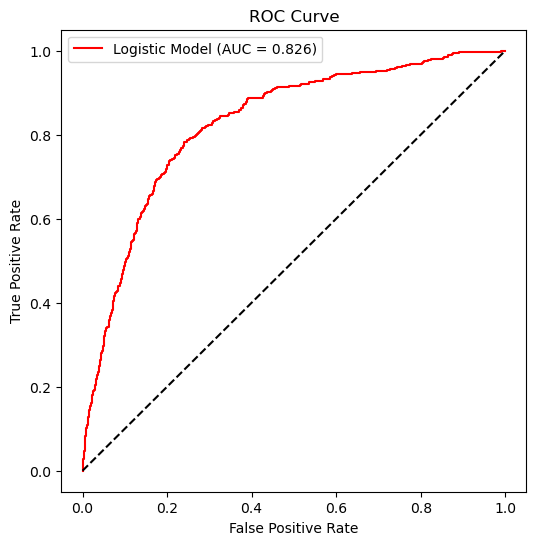

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# True labels


y_score = d3[:,1]    

# ROC curve
fpr, tpr, thresholds = roc_curve(y, y_score)

# AUC
auc = roc_auc_score(y, y_score)
print("AUC:", auc)

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='red', label='Logistic Model (AUC = %.3f)' % auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


######################## RANDOM FOREST MODEL CLASSIFIER  ###########################

In [50]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=100,max_features=4)

In [51]:
model1.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,4
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
model1.score(x_test,y_test)

0.95

In [53]:
model1.score(x_train,y_train)

1.0

In [54]:
d5=model1.predict(x_test)

In [55]:
d5

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [56]:
Rand_prob=model1.predict_proba(x_test)

In [57]:
Rand_prob

array([[0.8 , 0.2 ],
       [0.98, 0.02],
       [0.18, 0.82],
       ...,
       [0.99, 0.01],
       [0.93, 0.07],
       [0.96, 0.04]], shape=(1000, 2))

In [58]:
Random_Confu_Matrix=confusion_matrix(y_test,d5)

In [59]:
print(Random_Confu_Matrix)

[[851   6]
 [ 44  99]]


In [60]:
print(classification_report(y_test,d5))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       857
         1.0       0.94      0.69      0.80       143

    accuracy                           0.95      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.95      0.95      0.95      1000



AUC: 0.9439213062316913


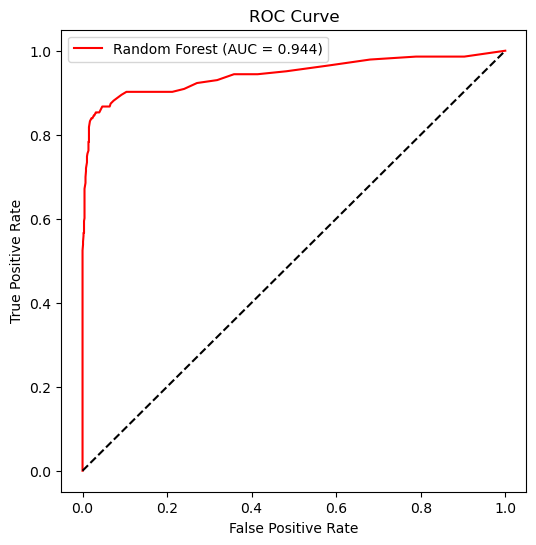

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# True labels


y_score = Rand_prob[:,1]    

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# AUC
auc = roc_auc_score(y_test, y_score)
print("AUC:", auc)

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='red', label='Random Forest (AUC = %.3f)' % auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [62]:
##### Finding Important features of the person who is churn 

In [63]:
import pandas as pd

importance = model1.feature_importances_

features = x_train.columns

feat_imp = pd.Series(importance, index=features)

feat_imp_sorted = feat_imp.sort_values(ascending=False)

feat_imp_sorted.head(10)


Day Mins          0.259676
CustServ Calls    0.118139
Eve Mins          0.114254
Intl Plan         0.089714
Intl Mins         0.085467
Intl Calls        0.065535
Night Mins        0.063443
Night Calls       0.053279
Day Calls         0.048907
Eve Calls         0.048153
dtype: float64

<Axes: >

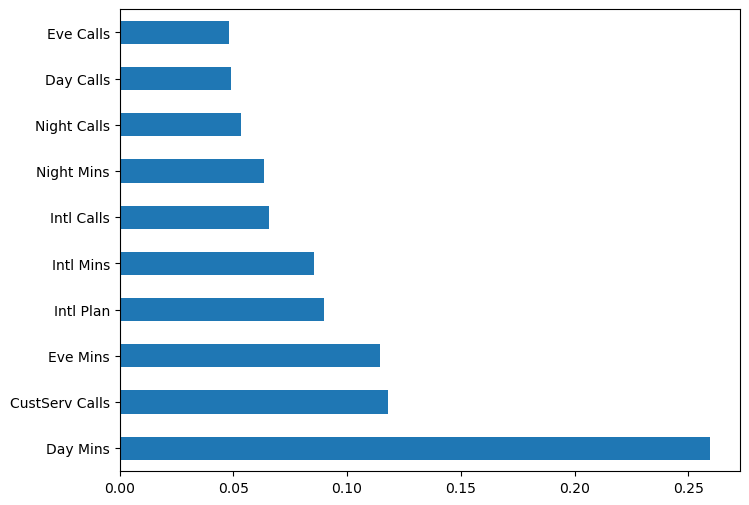

In [64]:
feat_imp_sorted.head(10).plot(kind='barh', figsize=(8,6))


####### MODEL COMPARISION #########

#### Model Comparison

| Model               | Accuracy | Recall (Churn) | ROC-AUC |
|--------------------|----------|----------------|---------|
| Logistic Regression| 0.78     | 0.80           | 0.83    |
| Random Forest      | 0.95     | 0.69           | 0.94    |

Random Forest outperformed Logistic Regression in overall accuracy and ROC-AUC.
Hence, Random Forest was selected as the final model for downstream business analysis.

## Final Model Selection
Based on performance evaluation, Random Forest Classifier is selected as the final model.
All downstream predictions, financial impact analysis, and recommendations are based on this model.



################# BUSINESS OUTPUTS ##################

In [2]:
### Predicting probablities

In [212]:
def predict_churn_prob(df):
    FEATURE_ORDER=['Intl Plan','VMail Plan','VMail Message','Day Mins','Day Calls','Eve Mins','Eve Calls','Night Mins','Night Calls','Intl Mins','Intl Calls','CustServ Calls']
    df_model = df[FEATURE_ORDER]
    return model1.predict_proba(df_model)[:, 1]

In [213]:
### Predicting Churning Risk as High, Mid, Low

In [214]:
def ChurnRisk(prob_data):
    return np.select(
    [prob_data >= 0.7, prob_data >= 0.5],
    ['High', 'Mid'],
    default='Low'
)
    

In [215]:
### Predicting FInancial Impact on Business

In [216]:
def Fin_Impact(Customer_data,prob_data):
    
    return(Customer_data['Day Charge']+Customer_data['Eve Charge']+Customer_data['Night Charge']+Customer_data['Intl Charge'])*prob_data*12

In [217]:
### SUggesting the recomendation based on the Churn Risk, Financial Impact

In [230]:
def seg_recom(prob_data,annual_impact):
    matrix=[['Ignore','Moniter','Loyalty Perks'],['Auto Offer','Promo + Nudges','Proactive Outreach'],['Minimal effort','Retention Discount','Deicated Retention Discount']]
    def get_seg(p,a):
        if(p>0.7):
            d=2
        elif(p>0.5):
            d=1
        else:
            d=0
        if(a<5000):
            q=0
        elif(a<15000):
            q=1
        else:
            q=2
        return matrix[d][q]
    return [
        get_seg(p, a)
        for p, a in zip(prob_data,annual_impact)
    ]


    

In [231]:
def final_result(customer):
    result=customer.copy()
    result['predict_churn_prob']=predict_churn_prob(customer)
    result['ChurnRisk']=ChurnRisk(result['predict_churn_prob'])
    result['Fin_Impact']=Fin_Impact(result,result['predict_churn_prob'])
    result['Seg_Recom']=seg_recom(result['predict_churn_prob'],result['Fin_Impact'])
    return result

In [ ]:
#### Applying Business Inputs #######


In [243]:
customer = pd.DataFrame({
    'Intl Plan':        [0, 0, 1, 0, 1],
    'VMail Plan':       [1, 0, 1, 0, 1],
    'VMail Message':    [25, 0, 17, 0, 8],

    'Day Mins':         [200, 156, 159, 342, 218],
    'Day Calls':        [90, 60, 40, 70, 65],
    'Day Charge':       [34.0, 26.5, 27.0, 58.1, 37.1],

    'Eve Mins':         [180, 140, 155, 290, 200],
    'Eve Calls':        [80, 55, 60, 65, 58],
    'Eve Charge':       [15.3, 11.9, 13.2, 24.7, 17.0],

    'Night Mins':       [220, 190, 210, 300, 240],
    'Night Calls':      [95, 85, 90, 100, 88],
    'Night Charge':     [9.9, 8.6, 9.5, 13.5, 10.8],

    'Intl Mins':        [10, 0, 15, 20, 8],
    'Intl Calls':       [3, 0, 4, 6, 2],
    'Intl Charge':      [2.7, 0.0, 4.1, 5.4, 2.2],

    'CustServ Calls':   [1, 3, 2, 5, 4]
})
customer.head()

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,0,1,25,200,90,34.0,180,80,15.3,220,95,9.9,10,3,2.7,1
1,0,0,0,156,60,26.5,140,55,11.9,190,85,8.6,0,0,0.0,3
2,1,1,17,159,40,27.0,155,60,13.2,210,90,9.5,15,4,4.1,2
3,0,0,0,342,70,58.1,290,65,24.7,300,100,13.5,20,6,5.4,5
4,1,1,8,218,65,37.1,200,58,17.0,240,88,10.8,8,2,2.2,4


In [244]:
final_result(customer)

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,predict_churn_prob,ChurnRisk,Fin_Impact,Seg_Recom
0,0,1,25,200,90,34.0,180,80,15.3,220,95,9.9,10,3,2.7,1,0.50,Mid,371.400,Ignore
1,0,0,0,156,60,26.5,140,55,11.9,190,85,8.6,0,0,0.0,3,0.76,High,428.640,Minimal effort
2,1,1,17,159,40,27.0,155,60,13.2,210,90,9.5,15,4,4.1,2,0.67,Mid,432.552,Auto Offer
3,0,0,0,342,70,58.1,290,65,24.7,300,100,13.5,20,6,5.4,5,0.80,High,976.320,Minimal effort
4,1,1,8,218,65,37.1,200,58,17.0,240,88,10.8,8,2,2.2,4,0.67,Mid,539.484,Auto Offer
